Importing Libraries

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2
from scipy.stats import ttest_ind, t, ttest_1samp

In [59]:
df = pd.read_csv('/Users/arnav/Desktop/MachineLearning/CSE558-DSc-Project/Data_Preproc_NoEncoding.csv')

labels = pd.read_csv('/Users/arnav/Desktop/MachineLearning/CSE558-DSc-Project/Labels.csv')

# Concatenate the labels to the dataframe
df = pd.concat([df, labels], axis=1)

In [60]:
df.head()

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season,class
0,15.26,x,g,o,f,e,c,w,16.95,17.09,w,t,g,d,w,p
1,16.60,x,g,o,f,e,c,w,17.99,18.19,w,t,g,d,u,p
2,14.07,x,g,o,f,e,c,w,17.80,17.74,w,t,g,d,w,p
3,14.17,f,h,e,f,e,c,w,15.77,15.98,w,t,p,d,w,p
4,14.64,x,h,o,f,e,c,w,16.53,17.20,w,t,p,d,w,p


### 3-Tier Hypothesis Testing

#### Main Hypothesis:

Null Hypothesis:

- $H_{0}$: The environmental and cap characteristics of mushrooms (i.e. Cap Diameter, Season, and Habitat) have no significant associations with their edibility.

Alternate Hypothesis:

- $H_{1}$: The characteristics of mushrooms (i.e. Cap Diameter, Season, and Habitat) have a significant associations with their edibility.

#### Sub-Hypotheses:
1. $H_{0a}$: The mean cap diameter of poisonous mushrooms is same as that of edible mushrooms.
2. $H_{0b}$: The season in the environment of mushrooms is independent of their edibility.
3. $H_{0c}$: The habitat preference of mushrooms is independent of their edibility.

For this, we'll run:

1. 2 Population Mean t-test : $H_{0a}$
2. $\chi^{2}$ test for Independence : $H_{0b}$
3. $\chi^{2}$ test for independence : $H_{0c}$

#### 2 Population Mean t-test: $H_{0a}$

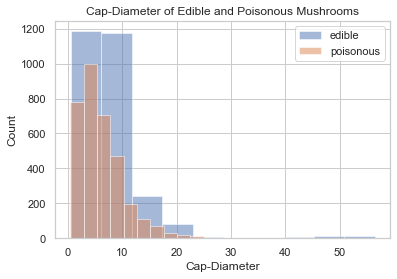

In [61]:
# Getting the Poisonous and Edible samples
sample_poisonous = df[df['class'] == 'p']['class']
sample_edible = df[df['class'] == 'e']['class']

# Getting the Poisonous and Edible cap-diameter
poisonous_cap_diameter = df[df['class'] == 'p']['cap-diameter']
edible_cap_diameter = df[df['class'] == 'e']['cap-diameter']

# Sampling 10% of the data
sample_poisonous_cap_diameter = poisonous_cap_diameter.sample(frac=0.1, random_state=1)
sample_edible_cap_diameter = edible_cap_diameter.sample(frac=0.1, random_state=1)

# plot histogram for cap-diameter of both edible and poisonous mushrooms
plt.hist(sample_edible_cap_diameter, bins=10, alpha=0.5, label='edible')
plt.hist(sample_poisonous_cap_diameter, bins=10, alpha=0.5, label='poisonous')
plt.legend(loc='upper right')
plt.title('Cap-Diameter of Edible and Poisonous Mushrooms')
plt.xlabel('Cap-Diameter')
plt.ylabel('Count')
plt.show()

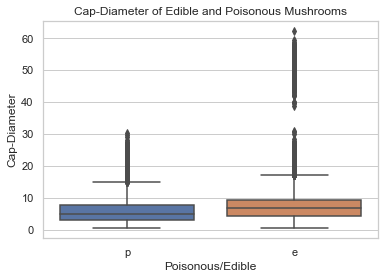

In [62]:
# Preparing a Box Plot of the Cap-Diameter of Edible and Poisonous Mushrooms
sns.boxplot(x='class', y='cap-diameter', data=df)
plt.title('Cap-Diameter of Edible and Poisonous Mushrooms')
plt.xlabel('Poisonous/Edible')
plt.ylabel('Cap-Diameter')
plt.show()

In [63]:
# T-test for cap-diameter of edible and poisonous mushrooms
t_stat, p_value = ttest_ind(sample_edible_cap_diameter, sample_poisonous_cap_diameter, equal_var=False)

# Printing the t-statistic and p-value
print(f"The value of the t-statistic is: {t_stat}")
print(f"The p-value is: {p_value}")

# Checking if the p-value is less than 0.05
alpha = 0.05

if p_value < alpha:
    print()
    print("The p-value is less than 0.05")
    print("Therefore, Reject the null hypothesis")
else:
    print()
    print("The p-value is greater than 0.05")
    print("Accept the null hypothesis")

The value of the t-statistic is: 13.142416975252187
The p-value is: 9.54598765126235e-39

The p-value is less than 0.05
Therefore, Reject the null hypothesis


The critical value of the t_statistic for this two-tail test is:  1.96035263869642


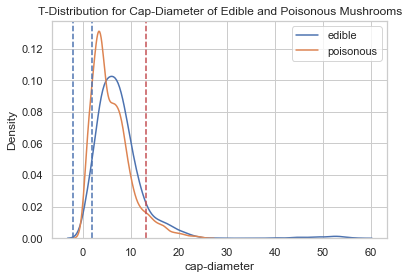

In [64]:
# Visualising the t-distribution
t_critical = t.ppf(1-alpha/2, df=sample_edible_cap_diameter.shape[0]+sample_poisonous_cap_diameter.shape[0]-2)
print("The critical value of the t_statistic for this two-tail test is: ", t_critical)

# Plotting the t-distribution
sns.kdeplot(sample_edible_cap_diameter, label='edible')
sns.kdeplot(sample_poisonous_cap_diameter, label='poisonous')
plt.axvline(x=t_stat, color='r', linestyle='--')
plt.axvline(x=t_critical, color='b', linestyle='--')
plt.axvline(x=-t_critical, color='b', linestyle='--')
plt.title('T-Distribution for Cap-Diameter of Edible and Poisonous Mushrooms')
plt.legend(loc='upper right')
plt.show()

Validation Experiment for Test 1:

In [65]:
# We now check the mean of the cap-diameter of edible and poisonous mushrooms
print("The mean of the cap-diameter of edible mushrooms is: ", sample_edible_cap_diameter.mean())
print("The mean of the cap-diameter of poisonous mushrooms is: ", sample_poisonous_cap_diameter.mean())

print()
print("We can see that the mean of the cap-diameter of edible mushrooms is significantly different from the mean of the cap-diameter of poisonous mushrooms")

print()
print("This validates our t-test")

The mean of the cap-diameter of edible mushrooms is:  7.748204562178073
The mean of the cap-diameter of poisonous mushrooms is:  5.959613455296549

We can see that the mean of the cap-diameter of edible mushrooms is significantly different from the mean of the cap-diameter of poisonous mushrooms

This validates our t-test


#### $\chi^{2}$ test for Independence : $H_{0b}$

In [66]:
# Check Unique Values from the Column 'Season'
df['season'].unique()

array(['w', 'u', 'a', 's'], dtype=object)

- We pick two categorical variables i.e. the Habitat of the Mushroom and the Edibility of the Mushroom (i.e. Poisonous or Edible)
- We perform $\chi^{2}$ test on these two categorical variables to determine if the two are independent or not.
- We will visualise these two variables together now

In [67]:
contingency_table = pd.crosstab(df['season'], 
 df['class'])

contingency_table

class,e,p
season,,
a,12785,17392
s,1553,1174
u,9647,13251
w,3196,2071


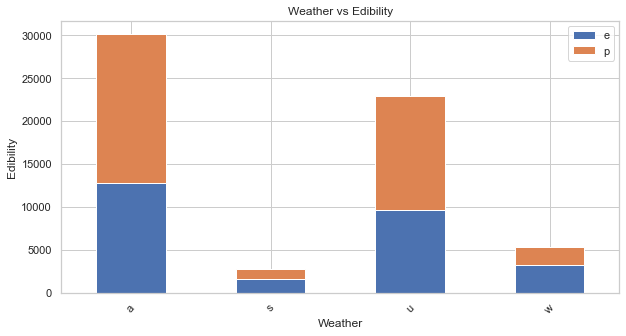

In [68]:
# Visualize the CrossTab using a stacked bar chart
contingency_table.plot(kind='bar', stacked=True, figsize=(10,5))

plt.title('Weather vs Edibility')
plt.xlabel('Weather')
plt.ylabel('Edibility')
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.show()

In [69]:
# Calculate observed frequencies
O = contingency_table.values

# Calculate expected frequencies
n = np.sum(O)
row_totals = np.sum(O, axis=1)
col_totals = np.sum(O, axis=0)

# Calculate expected frequencies for each cell
E = np.outer(row_totals, col_totals) / n

print("Expected Frequencies:")
print(E)

Expected Frequencies:
[[13431.38150289 16745.61849711]
 [ 1213.75144509  1513.24855491]
 [10191.59537572 12706.40462428]
 [ 2344.2716763   2922.7283237 ]]


In [70]:
# Calculate the chi-squared statistic
chi2_stat = 0
for i in range(O.shape[0]):
    for j in range(O.shape[1]):
        chi2_stat += ((O[i,j] - E[i,j]) ** 2) / E[i,j]

# Calculate the p-value
dof = (O.shape[0] - 1) * (O.shape[1] - 1)
p_value = 1 - chi2.cdf(chi2_stat, dof)

print('Chi-Squared Statistic:', chi2_stat)
print('Degrees of Freedom:', dof)
print('P-Value:', p_value)

Chi-Squared Statistic: 837.0349697811023
Degrees of Freedom: 3
P-Value: 0.0


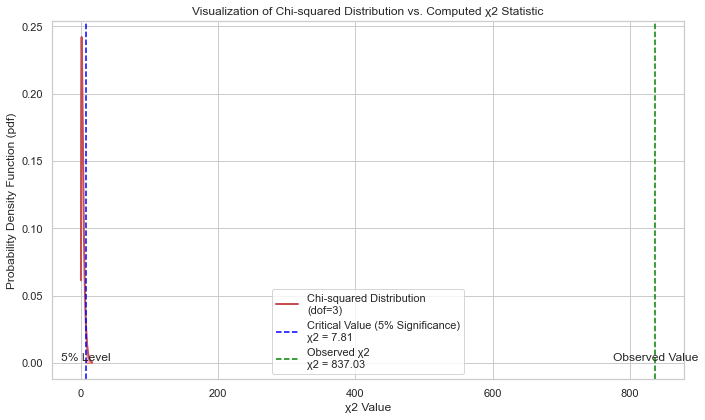

In [71]:
# Set up the plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Values for x-axis
x = np.linspace(chi2.ppf(0.001, dof), chi2.ppf(0.999, dof), 1000)

# Plot chi-squared distribution
plt.plot(x, chi2.pdf(x, dof), 'r-', lw=2, label=f'Chi-squared Distribution\n(dof={dof})')

# Highlight the region beyond the critical value for 5% significance
critical_value = chi2.ppf(0.95, dof)
plt.fill_between(x, chi2.pdf(x, dof), where=(x > critical_value), color="red", alpha=0.3)

# Annotate the 5% critical value
plt.axvline(critical_value, color='blue', linestyle='--', label=f'Critical Value (5% Significance)\nχ2 = {critical_value:.2f}')
plt.text(critical_value, 0, '5% Level', horizontalalignment='center', verticalalignment='bottom')

# Annotate the computed chi2 statistic
plt.axvline(chi2_stat, color='green', linestyle='--', label=f'Observed χ2\nχ2 = {chi2_stat:.2f}')
plt.text(chi2_stat, 0, 'Observed Value', horizontalalignment='center', verticalalignment='bottom')

# Add title and labels
plt.title("Visualization of Chi-squared Distribution vs. Computed χ2 Statistic")
plt.xlabel("χ2 Value")
plt.ylabel("Probability Density Function (pdf)")
plt.legend()

plt.tight_layout()
plt.show()

- This suggest with a very strong statistical significance to reject our Null Hypothesis.
- Therefore from this test, we can conclude that strongly that there exists a strong dependence between the Mushroom's edibility and the Season at the time of observation

### Validation Experiments

1. We check the Expected Frequency Table for any frequency less than 5:

In [72]:
count_low_freq = (E < 5).sum()
total_cells = E.size

print(f"Cells with expected frequency < 5: {count_low_freq}/{total_cells}")

Cells with expected frequency < 5: 0/8


2. Boostrapping to Test Consistency

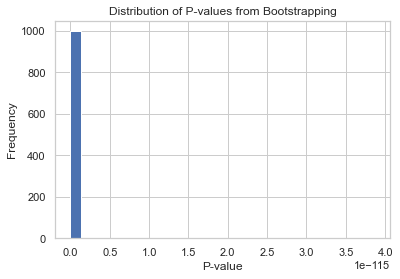

In [73]:
from scipy.stats import chi2_contingency

n_iterations = 1000
p_values_bootstrap = []

for _ in range(n_iterations):
    bootstrap_sample = df.sample(frac=0.8, replace=True)
    bootstrap_contingency = pd.crosstab(bootstrap_sample['season'], bootstrap_sample['class'])
    
    _, p_bootstrap, _, _ = chi2_contingency(bootstrap_contingency)
    p_values_bootstrap.append(p_bootstrap)

# Now you can visualize the distribution of p-values if desired
plt.hist(p_values_bootstrap, bins=30)
plt.xlabel('P-value')
plt.ylabel('Frequency')
plt.title('Distribution of P-values from Bootstrapping')
plt.show()

- This consistency validates our $\chi^{2}$-test for Independence of Habitat and Edibility variables

#### $\chi^{2}$ test for Independence : $H_{0c}$

In [74]:
# Check Unique Values from the Column 'habitat'
df['habitat'].unique()

array(['d', 'm', 'g', 'h', 'l', 'p', 'w', 'u'], dtype=object)

- We pick two categorical variables i.e. the Habitat of the Mushroom and the Edibility of the Mushroom (i.e. Poisonous or Edible)
- We perform $\chi^{2}$ test on these two categorical variables to determine if the two are independent or not.
- We will visualise these two variables together now

In [75]:
contingency_table = pd.crosstab(df['habitat'], 
 df['class'])

contingency_table

class,e,p
habitat,,
d,20163,24046
g,2489,5454
h,696,1305
l,1938,1230
m,1427,1493
p,0,360
u,115,0
w,353,0


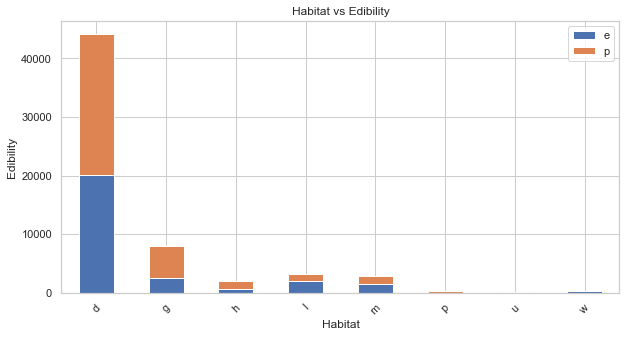

In [76]:
# Visualize the CrossTab using a stacked bar chart
contingency_table.plot(kind='bar', stacked=True, figsize=(10,5))

plt.title('Habitat vs Edibility')
plt.xlabel('Habitat')
plt.ylabel('Edibility')
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.show()

In [77]:
# Calculate observed frequencies
O = contingency_table.values

# Calculate expected frequencies
n = np.sum(O)
row_totals = np.sum(O, axis=1)
col_totals = np.sum(O, axis=0)

# Calculate expected frequencies for each cell
E = np.outer(row_totals, col_totals) / n

print("Expected Frequencies:")
print(E)

Expected Frequencies:
[[19676.83815029 24532.16184971]
 [ 3535.32369942  4407.67630058]
 [  890.61849711  1110.38150289]
 [ 1410.03468208  1757.96531792]
 [ 1299.65317919  1620.34682081]
 [  160.23121387   199.76878613]
 [   51.1849711     63.8150289 ]
 [  157.11560694   195.88439306]]


In [78]:
# Calculate the chi-squared statistic
chi2_stat = 0
for i in range(O.shape[0]):
    for j in range(O.shape[1]):
        chi2_stat += ((O[i,j] - E[i,j]) ** 2) / E[i,j]

# Calculate the p-value
dof = (O.shape[0] - 1) * (O.shape[1] - 1)
p_value = 1 - chi2.cdf(chi2_stat, dof)

print('Chi-Squared Statistic:', chi2_stat)
print('Degrees of Freedom:', dof)
print('P-Value:', p_value)

Chi-Squared Statistic: 1907.3094166973817
Degrees of Freedom: 7
P-Value: 0.0


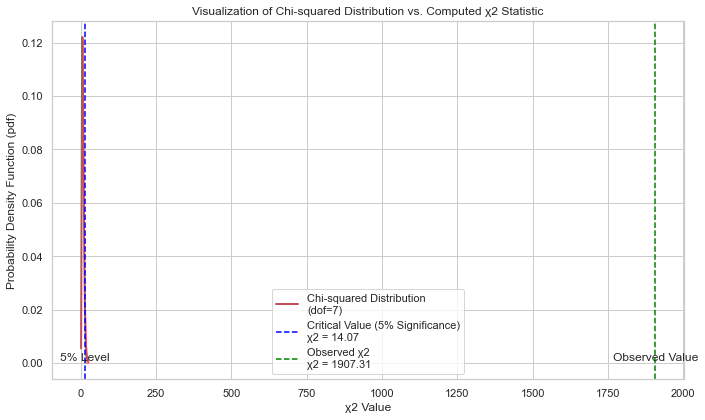

In [79]:
# Set up the plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Values for x-axis
x = np.linspace(chi2.ppf(0.001, dof), chi2.ppf(0.999, dof), 1000)

# Plot chi-squared distribution
plt.plot(x, chi2.pdf(x, dof), 'r-', lw=2, label=f'Chi-squared Distribution\n(dof={dof})')

# Highlight the region beyond the critical value for 5% significance
critical_value = chi2.ppf(0.95, dof)
plt.fill_between(x, chi2.pdf(x, dof), where=(x > critical_value), color="red", alpha=0.3)

# Annotate the 5% critical value
plt.axvline(critical_value, color='blue', linestyle='--', label=f'Critical Value (5% Significance)\nχ2 = {critical_value:.2f}')
plt.text(critical_value, 0, '5% Level', horizontalalignment='center', verticalalignment='bottom')

# Annotate the computed chi2 statistic
plt.axvline(chi2_stat, color='green', linestyle='--', label=f'Observed χ2\nχ2 = {chi2_stat:.2f}')
plt.text(chi2_stat, 0, 'Observed Value', horizontalalignment='center', verticalalignment='bottom')

# Add title and labels
plt.title("Visualization of Chi-squared Distribution vs. Computed χ2 Statistic")
plt.xlabel("χ2 Value")
plt.ylabel("Probability Density Function (pdf)")
plt.legend()

plt.tight_layout()
plt.show()

- This suggest with a very strong statistical significance to reject our Null Hypothesis.
- Therefore from this test, we can conclude that strongly that there exists a strong dependence between the Mushroom's edibility and the Habitat type

### Validation Experiments

1. We check the Expected Frequency Table for any frequency less than 5:

In [80]:
count_low_freq = (E < 5).sum()
total_cells = E.size

print(f"Cells with expected frequency < 5: {count_low_freq}/{total_cells}")

Cells with expected frequency < 5: 0/16


2. Boostrapping to Test Consistency

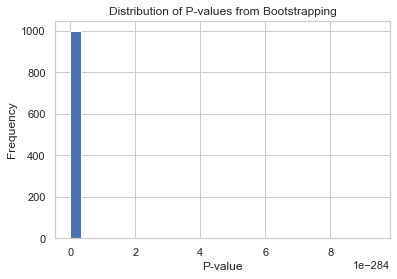

In [81]:
from scipy.stats import chi2_contingency

n_iterations = 1000
p_values_bootstrap = []

for _ in range(n_iterations):
    bootstrap_sample = df.sample(frac=0.8, replace=True)
    bootstrap_contingency = pd.crosstab(bootstrap_sample['habitat'], bootstrap_sample['class'])
    
    _, p_bootstrap, _, _ = chi2_contingency(bootstrap_contingency)
    p_values_bootstrap.append(p_bootstrap)

# Now you can visualize the distribution of p-values if desired
plt.hist(p_values_bootstrap, bins=30)
plt.xlabel('P-value')
plt.ylabel('Frequency')
plt.title('Distribution of P-values from Bootstrapping')
plt.show()

- This consistency validates our $\chi^{2}$-test for Independence of Habitat and Edibility variables

### Final Conclusion from the Tests

- We reject our sub null hypothesis $H_{0a}$, $H_{0b}$ and $H_{0c}$.
- Our main null hypothesis can be written as:
$$
H_{0} = H_{0a} \cap H_{0b} \cap H_{0c}
$$

- Thus by rejecting these 3, we can state that our main null hypothesis $H_{0}$ is rejected and our alternate hypothesis $H_{1}$ is accepted.

- Hence, we can conclude from these tests that there exists a strong dependence between a Mushroom's Edibility and its environmental and cap characteristics.